<a id="section1"></a>
#### Erroen kokaeraren adibide sinplea

Erroen kokaera `evans` komandua erabiliz. beti bezala lehenago begizta irekiko transferentzia funtzioa definitzen da (Berrelikadura unitarioa)
<a id="warmUpExercise"></a>

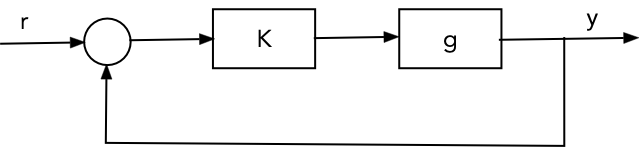


In [22]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
s=ct.tf('s')
g=1/s/(s + 1)/(s + 3)
g

TransferFunction(array([1]), array([1, 4, 3, 0]))

`rlocus` komandua erabiltzen da. Klikatzen irudian egonkortasun muga ikus daiteke. `grid=True` aukera erabiltzen da $\omega_n$ eta $\delta$ konstanteak islatzeko.

(-5.0, 5.0)

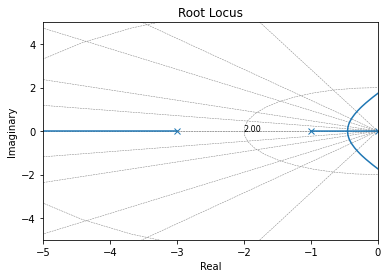

In [16]:
%matplotlib inline
#inline or osx

ct.rlocus(g, grid= True);
plt.xlim([-5,0])
plt.ylim([-5,5])

Egonkortasuna
* $0<K<12$

Sistema motela eta oszilaziorik gabe $K=0.63$ izan arte. Gero oszilakorra da, gero eta oszilakorragoa, ez egonkorra izan arte.

Adibide, numerikoak.

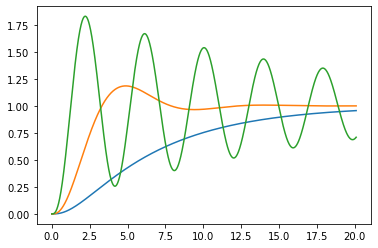

In [42]:
%matplotlib inline 
#inline or osx
t=np.r_[0:20.1:0.01]

K=0.4;
gitxia=ct.feedback(K*g, 1);
response1=ct.step_response(gitxia, T=t);
K=2;
gitxia=ct.feedback(K*g, 1);
response2=ct.step_response(gitxia,T=t);
K=10;
gitxia=ct.feedback(K*g, 1);
response3=ct.step_response(gitxia,T=t);

plt.plot(t,response1.y.reshape(2010,),t,response2.y.reshape(2010,),t,response3.y.reshape(2010,));

Begiratzeko $\delta=0.5$ non den, `sgrid` komanduak emandako lerroak aztertuz balio hori non gurutzatzen den EKn

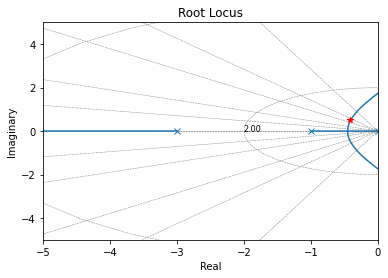

In [47]:
%matplotlib inline 
#osx or native

ct.rlocus(g, grid= True);
plt.xlim([-5,0])
plt.ylim([-5,5])
s1=-0.407+1j*0.49;
plt.plot(s1.real,s1.imag,'*r')

Hau da, $K=1.3$ gutxi gorabehera.

#### Bertsio diskretua

Lehengo lagintze denbora ($T_l$) aukeratu behar da. Ez dagoenez argi begizta itxiko abiadura, erreferentzia bat aukeratzen dugu (egokia ez bada, gero aldatu daiteke).

Kasu honetan, aukeratzen da $K=1$, eta begiratzen da emaitza denbora eremuan

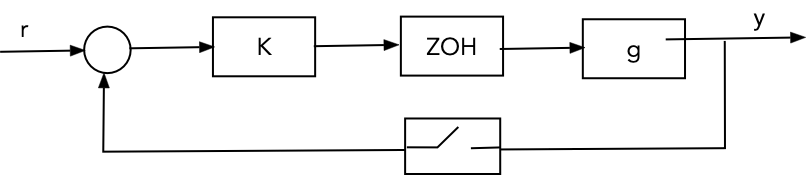



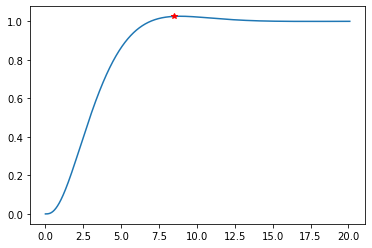

In [56]:
K=1;
gitxia=ct.feedback(K*g, 1);
response=ct.step_response(gitxia,T=t);

plt.plot(t,response.y.reshape(2010,));
s1=[8.5, 1.025];
plt.plot(s1[0],s1[1],'*r')

Puntako denbora $T_1=8.5$ s da gutxi gorabehera, beraz $T_l=T_1/15$ ($10-15$) tartea egokia izan daiteke).

$T_l$ horrekin bertsio diskretua lortzen da.

In [57]:
Tl=8.5/15;
gz=ct.c2d(g,Tl)
gz

TransferFunction(array([0.01800219, 0.04295061, 0.00583073]), array([ 1.        , -1.75009719,  0.85375432, -0.10365713]), 0.5666666666666667)

Errepikatzen da prozesuan Z planoan; kasu honetan `zgrid` komandua erabiltzen da $\omega_n$ eta $\delta$ konstanteak islatzeko.

(-1.0, 1.0)

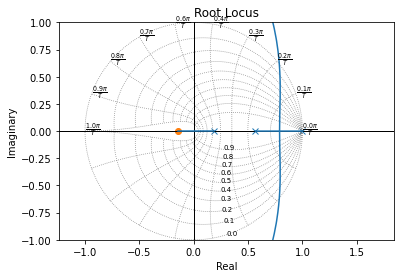

In [58]:
%matplotlib inline 
#osx or native

ct.rlocus(gz, grid= True);
plt.xlim([-0.4,1])
plt.ylim([-1,1])

In [67]:
len(u[0])

150

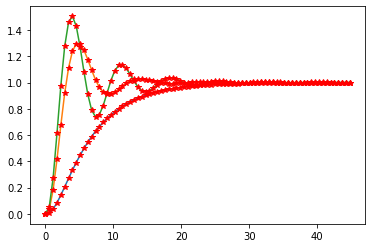

In [80]:
N=80
u=np.ones((1,N));

%matplotlib inline 
#inline or osx
t=np.r_[0:len(u[0])]*Tl

K=0.4;
gitxia=ct.feedback(K*gz, 1);
response1=ct.step_response(gitxia, T=t);
K=2;
gitxia=ct.feedback(K*gz, 1);
response2=ct.step_response(gitxia,T=t);
K=3;
gitxia=ct.feedback(K*gz, 1);
response3=ct.step_response(gitxia,T=t);

plt.plot(t,response1.y.reshape(N,),t,response2.y.reshape(N,),t,response3.y.reshape(N,));
plt.plot(t,response1.y.reshape(N,),'*r',t,response2.y.reshape(N,),'*r',t,response3.y.reshape(N,),'*r');

Zergaitik aukeratu dut $K$ mazimo txikiagoa?

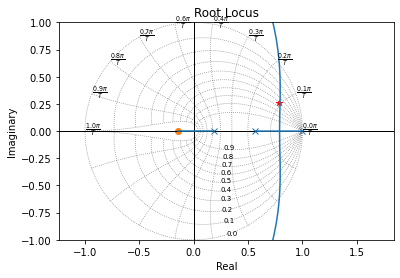

In [83]:
%matplotlib inline 
#osx or native

ct.rlocus(gz, grid= True);
plt.xlim([-0.4,1])
plt.ylim([-1,1])
z1=0.783+1j*0.26;
plt.plot(z1.real,z1.imag,'*r');

$K$-ren balioa antzekoa da, baina pixka bat handiagoa (1.37)